Pythonで確率分布をプロットする（interactive版）
======
***

## 1. 準備
---

In [1]:
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from ipywidgets import interact
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12, 6)

# matplotlibでTexをラベルに使うため
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# default color
colors = ["blue", "orange", "green", "red"]

## 2. 離散型確率分布
---

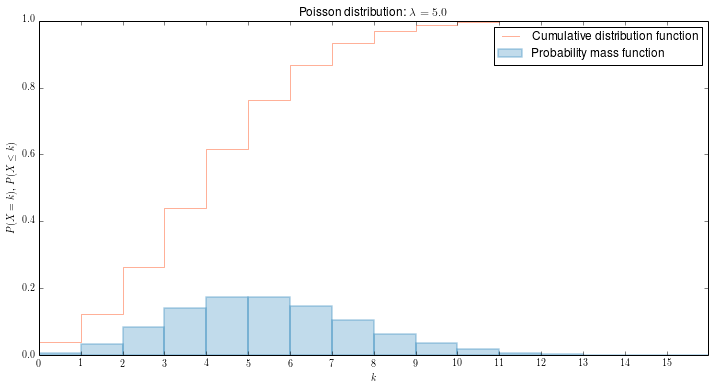

In [2]:
# Poisson distributionの確率質量関数（単一のλ）
k_max = 16
k = np.arange(k_max)

@interact(lambda_=(0.0, 10.0))
def plot_poisson(lambda_):
    plt.bar(k, stats.poisson.pmf(k, lambda_), color="#348ABD", width=1.0, lw="2", edgecolor="#348ABD",
            label="Probability mass function", alpha=0.3)
   
    plt.step(k, stats.poisson.cdf(k, lambda_), color="#ff7c54",
            label="Cumulative distribution function", alpha=0.6)

    plt.xticks(k)
    plt.legend(loc="upper right")
    plt.ylim((0.0, 1.0))
    plt.ylabel("$P(X=k)$, $P(X \leq k)$")
    plt.xlabel("$k$")
    plt.title("Poisson distribution: $\lambda = %.1f$" % lambda_)

## 3. 連続型確率分布
---

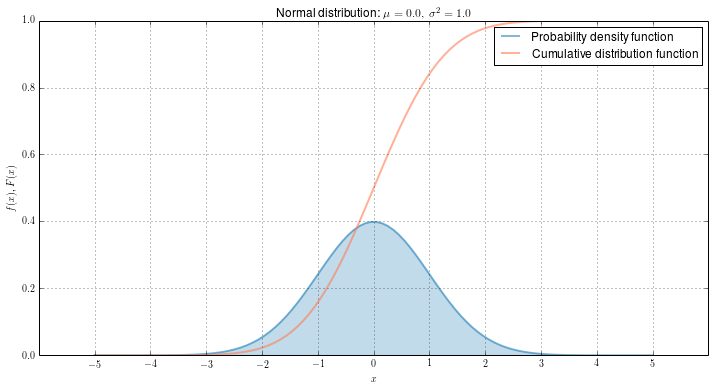

In [4]:
# Normal distributionの確率密度関数（単一のパラメータ）
x = np.linspace(-5, 5, 100)

@interact(mu=(-2.0, 2.0), sigma2=(0.0, 2.0))
def plot_norm(mu, sigma2):
    plt.plot(x, stats.norm.pdf(x, mu, sigma2), color="#348ABD", lw="2",
            label="Probability density function", alpha=0.6)
    plt.fill_between(x, stats.norm.pdf(x, mu, sigma2), color="#348ABD", alpha=0.3)
    
    plt.plot(x, stats.norm.cdf(x, mu, sigma2), lw="2", color="#ff7c54",
            label="Cumulative distribution function", alpha=0.6)

    plt.legend(loc="upper right")
    plt.xticks(np.arange(-5, 6))
    plt.grid()
    plt.ylim((0.0, 1.0))
    plt.ylabel("$f(x)$, $F(x)$")
    plt.xlabel("$x$")
    plt.title("Normal distribution: $ \mu = %.1f,\: \sigma ^2 = %.1f$" % (mu, sigma2))